# Receive Frequency Modulation

In [1]:
from scapy.all import get_if_list

def list_interfaces():
    interfaces = get_if_list()
    print("Available network interfaces:")
    for interface in interfaces:
        print(interface)

if __name__ == "__main__":
    list_interfaces()

Available network interfaces:
{81DBAD8C-689F-475B-8591-54D69E10BA9A}
{2A4B31E9-B6E2-471C-A85F-BAEA51690661}
{14732A35-A487-4C35-9A20-97F85400D23A}
{8F72A598-1E86-410B-A098-7188588F7919}
\Device\NPF_Loopback
{85A90889-9038-4080-B018-D64F0C71CB33}


## IP Listen, Plot & Decode

In [ ]:
from scapy.all import sniff, IP, UDP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(ICMP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 0.33, atol=0.05):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 0.39, atol=0.05):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)

def main():
    # Network configuration
    global expected_src_ip
    expected_src_ip = "192.168.1.155"  # Adjust as necessary
    #listen_port = 666  # UDP port to listen on

    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter="icmp", prn=handle_packet, store=False, count=10)  # Adjust timeout as needed

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()

## ICMP Listen, Plot, & Decode

Starting UDP packet capture...
Packet received at 1714632977.745535
Packet received at 1714632980.7660277
Packet received at 1714632983.2798176
Packet received at 1714632985.8001392
Packet received at 1714632988.3169332
Packet received at 1714632991.3267207
Packet received at 1714632993.845367
Packet received at 1714632996.3531525
Packet received at 1714632998.866486


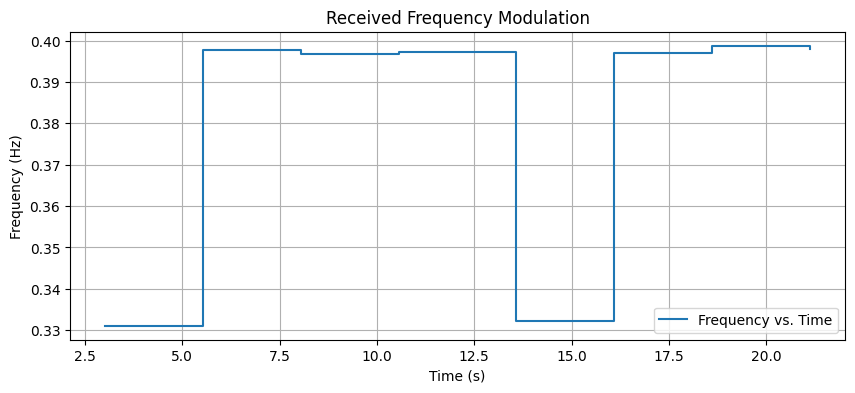

Decoded binary data: 01110111


In [23]:
from scapy.all import sniff, IP, UDP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(ICMP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 0.33, atol=0.05):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 0.39, atol=0.05):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)

def main():
    # Network configuration
    global expected_src_ip
    expected_src_ip = "192.168.1.155"  # Adjust as necessary
    #listen_port = 666  # UDP port to listen on

    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter="icmp", prn=handle_packet, store=False, count=10)  # Adjust timeout as needed

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()

## Listen for UDP Port & Decode

Starting UDP packet capture...
Packet received at 1714621132.6630318
Packet received at 1714621135.680281
Packet received at 1714621138.1960688
Packet received at 1714621141.2158747
Packet received at 1714621143.7291858
Packet received at 1714621146.2369692
Packet received at 1714621148.7501574
Packet received at 1714621151.2639492
Packet received at 1714621154.2791932
Packet received at 1714621157.29544


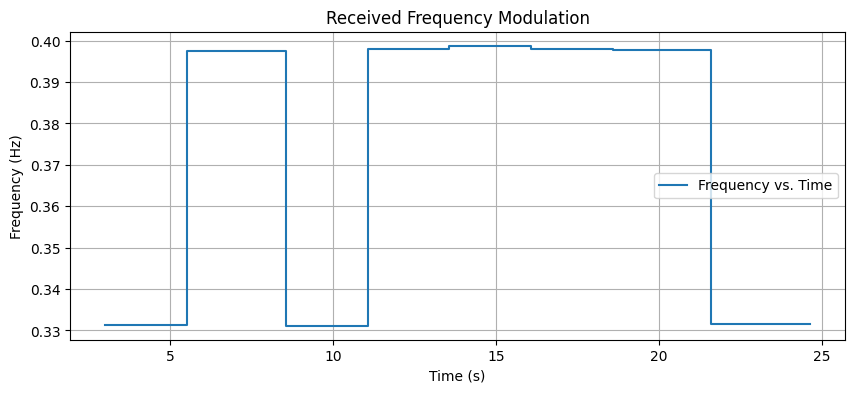

Decoded binary data: 010111100


In [16]:
from scapy.all import sniff, IP, UDP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(UDP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Packet received at {current_time}")

def plot_waveform(timestamps):
    """ Plot the waveform from packet intervals. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals

    plt.figure(figsize=(10, 4))
    plt.step(times, frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
     # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 0.33, atol=0.05):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 0.39, atol=0.05):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)

def main():
    # Network configuration
    global expected_src_ip
    expected_src_ip = "192.168.1.155"  # Adjust as necessary
    listen_port = 666  # UDP port to listen on

    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter=f"udp and port {listen_port}", prn=handle_packet, store=False, count=10)  # Adjust timeout as needed

    # After capture process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_waveform(timestamps)

if __name__ == "__main__":
    main()

## TCP Attempt Potentially Bi-Directional

In [17]:
from scapy.all import sniff, IP, TCP
import numpy as np
import matplotlib.pyplot as plt
import time

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Callback function to handle each received packet and log the timestamp. """
    if packet.haslayer(TCP) and packet[IP].src == expected_src_ip:
        current_time = time.time()
        timestamps.append(current_time)
        print(f"TCP packet received at {current_time}: {packet[TCP].flags}")

def plot_and_decode_waveform(timestamps):
    """ Plot the waveform from packet intervals and decode the binary data. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    times = np.cumsum(intervals)  # Calculate cumulative times for plotting
    frequencies = 1 / intervals  # Frequency calculation from intervals
    
    # Plotting the frequency modulation
    plt.figure(figsize=(10, 4))
    plt.step(times[:-1], frequencies, where='post', label='Frequency vs. Time')
    plt.title('Received Frequency Modulation')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Decoding binary data
    binary_data = ''
    for freq in frequencies:
        if np.isclose(freq, 1, atol=0.1):  # Assuming frequency of '0' is around 1 Hz
            binary_data += '0'
        elif np.isclose(freq, 2, atol=0.1):  # Assuming frequency of '1' is around 2 Hz
            binary_data += '1'

    print("Decoded binary data:", binary_data)

def main():
    # Network configuration
    global expected_src_ip
    expected_src_ip = "192.168.1.155"  # Adjust as necessary
    listen_port = 12345  # TCP port to listen on

    # Start packet sniffing
    print("Starting TCP packet capture...")
    sniff(filter=f"tcp and port {listen_port}", prn=handle_packet, store=False, timeout=10)  # Adjust timeout as needed

    # After capture, process and plot, ensure there are enough timestamps
    if len(timestamps) > 1:
        plot_and_decode_waveform(timestamps)

if __name__ == "__main__":
    main()

Starting TCP packet capture...
TCP packet received at 1714622462.4854963: S
